In [1]:
import sys
print(sys.executable) 

/opt/homebrew/Caskroom/miniforge/base/envs/noTF/bin/python3.8


In [2]:
# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle
import scipy.stats

# Import MAVE-NN
import mavenn

# Import Logomaker for visualization
import logomaker

# Get list of demos
mavenn.run_demo()

To run a demo, execute

	>>> mavenn.run_demo(name)

where 'name' is one of the following strings:

	1. "gb1_ge_evaluation"
	2. "mpsa_ge_training"
	3. "sortseq_mpa_visualization"

Python code for each demo is located in

	/opt/homebrew/Caskroom/miniforge/base/envs/noTF/lib/python3.8/site-packages/mavenn/examples/demos/



['gb1_ge_evaluation', 'mpsa_ge_training', 'sortseq_mpa_visualization']

In [30]:
# Set figure size
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300}, font_scale = 1)
sns.set_theme(style = "white")

In [3]:
# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']

# Create list of model names
model_names = [f'all_promoters_{gpmap_type}_ge_{i}' for gpmap_type in gpmap_types for i in range(25)]

# Load models into a dictionary indexed by model name
model_dict = {name:mavenn.load(name) for name in model_names}

2023-06-16 16:04:13.884856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model loaded from these files:
	all_promoters_additive_ge_0.pickle
	all_promoters_additive_ge_0.h5
Model loaded from these files:
	all_promoters_additive_ge_1.pickle
	all_promoters_additive_ge_1.h5
Model loaded from these files:
	all_promoters_additive_ge_2.pickle
	all_promoters_additive_ge_2.h5
Model loaded from these files:
	all_promoters_additive_ge_3.pickle
	all_promoters_additive_ge_3.h5
Model loaded from these files:
	all_promoters_additive_ge_4.pickle
	all_promoters_additive_ge_4.h5
Model loaded from these files:
	all_promoters_additive_ge_5.pickle
	all_promoters_additive_ge_5.h5
Model loaded from these files:
	all_promoters_additive_ge_6.pickle
	all_promoters_additive_ge_6.h5
Model loaded from these files:
	all_promoters_additive_ge_7.pickle
	all_promoters_additive_ge_7.h5
Model loaded from these files:
	all_promoters_additive_ge_8.pickle
	all_promoters_additive_ge_8.h5
Model loaded from these files:
	all_promoters_additive_ge_9.pickle
	all_promoters_additive_ge_9.h5
Model load

Model loaded from these files:
	all_promoters_blackbox_ge_7.pickle
	all_promoters_blackbox_ge_7.h5
Model loaded from these files:
	all_promoters_blackbox_ge_8.pickle
	all_promoters_blackbox_ge_8.h5
Model loaded from these files:
	all_promoters_blackbox_ge_9.pickle
	all_promoters_blackbox_ge_9.h5
Model loaded from these files:
	all_promoters_blackbox_ge_10.pickle
	all_promoters_blackbox_ge_10.h5
Model loaded from these files:
	all_promoters_blackbox_ge_11.pickle
	all_promoters_blackbox_ge_11.h5
Model loaded from these files:
	all_promoters_blackbox_ge_12.pickle
	all_promoters_blackbox_ge_12.h5
Model loaded from these files:
	all_promoters_blackbox_ge_13.pickle
	all_promoters_blackbox_ge_13.h5
Model loaded from these files:
	all_promoters_blackbox_ge_14.pickle
	all_promoters_blackbox_ge_14.h5
Model loaded from these files:
	all_promoters_blackbox_ge_15.pickle
	all_promoters_blackbox_ge_15.h5
Model loaded from these files:
	all_promoters_blackbox_ge_16.pickle
	all_promoters_blackbox_ge_16

In [5]:
# Get data from Jamie's library in CRX wt retina

Data_file = open("CRX_NRL_trainval.pkl", "rb")
trainval_df = pickle.load(Data_file)
Data_file.close()

Data_file = open("CRX_NRL_test.pkl", "rb")
test_df = pickle.load(Data_file)
Data_file.close()

Data_df = pd.DataFrame()
Data_df['x'] = pd.concat([trainval_df['Sequence'], test_df['Sequence']])
assignments = []
for validation in trainval_df['validation']:
    if validation:
        assignments.append('validation')
    else:
        assignments.append('training')
assignments = assignments + ['test']*len(test_df)
Data_df['set'] = assignments
Data_df

,x,set
0,OOOOP,training
1,OOOcP,validation
2,OOOnP,training
3,OOONP,training
4,OOOrP,training
...,...,...
273,xRnRH,test
274,XRXXH,test
275,XxCNH,test
276,xxNxH,test


In [6]:
# Fit bootstrap models

name = 'all_promoters_pairwise_ge_14'

# Get model
model = model_dict[name]

bootstrap_models = model.bootstrap(Data_df, num_models = 20)
for i, model in enumerate(bootstrap_models):
    model_name = "CRX_NRL_bootstrap_" + str(i)
    model.save(model_name)

Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 0 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.163 sec.


0epoch [00:00, ?epoch/s]

Training time: 31.5 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 1 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.325 sec.


0epoch [00:00, ?epoch/s]

Training time: 38.7 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 2 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.144 sec.


0epoch [00:00, ?epoch/s]

Training time: 36.6 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 3 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.0927 sec.


0epoch [00:00, ?epoch/s]

Training time: 94.1 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 4 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.139 sec.


0epoch [00:00, ?epoch/s]

Training time: 49.3 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 5 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.0931 sec.


0epoch [00:00, ?epoch/s]

Training time: 31.0 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 6 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.248 sec.


0epoch [00:00, ?epoch/s]

Training time: 25.0 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 7 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.193 sec.


0epoch [00:00, ?epoch/s]

Training time: 27.0 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 8 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.106 sec.


0epoch [00:00, ?epoch/s]

Training time: 29.4 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 9 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.104 sec.


0epoch [00:00, ?epoch/s]

Training time: 85.2 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 10 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.121 sec.


0epoch [00:00, ?epoch/s]

Training time: 24.8 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 11 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.124 sec.


0epoch [00:00, ?epoch/s]

Training time: 28.2 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 12 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.149 sec.


0epoch [00:00, ?epoch/s]

Training time: 38.8 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 13 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.21 sec.


0epoch [00:00, ?epoch/s]

Training time: 29.6 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 14 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.0878 sec.


0epoch [00:00, ?epoch/s]

Training time: 24.5 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 15 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.087 sec.


0epoch [00:00, ?epoch/s]

Training time: 25.1 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 16 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.0891 sec.


0epoch [00:00, ?epoch/s]

Training time: 37.5 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 17 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.0874 sec.


0epoch [00:00, ?epoch/s]

Training time: 21.1 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 18 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.0967 sec.


0epoch [00:00, ?epoch/s]

Training time: 29.0 seconds
Training set   :    2,064 observations (  79.94%)
Validation set :      240 observations (   9.30%)
Test set       :      278 observations (  10.77%)
-------------------------------------------------
Total dataset  :    2,582 observations ( 100.00%)

training model 19 ...
N = 2,304 observations set as training data.
Using 10.4% for validation.
Data shuffled.
Time to set data: 0.157 sec.


0epoch [00:00, ?epoch/s]

Training time: 47.0 seconds
Model saved to these files:
	CRX_NRL_bootstrap_0.pickle
	CRX_NRL_bootstrap_0.h5
Model saved to these files:
	CRX_NRL_bootstrap_1.pickle
	CRX_NRL_bootstrap_1.h5
Model saved to these files:
	CRX_NRL_bootstrap_2.pickle
	CRX_NRL_bootstrap_2.h5
Model saved to these files:
	CRX_NRL_bootstrap_3.pickle
	CRX_NRL_bootstrap_3.h5
Model saved to these files:
	CRX_NRL_bootstrap_4.pickle
	CRX_NRL_bootstrap_4.h5
Model saved to these files:
	CRX_NRL_bootstrap_5.pickle
	CRX_NRL_bootstrap_5.h5
Model saved to these files:
	CRX_NRL_bootstrap_6.pickle
	CRX_NRL_bootstrap_6.h5
Model saved to these files:
	CRX_NRL_bootstrap_7.pickle
	CRX_NRL_bootstrap_7.h5
Model saved to these files:
	CRX_NRL_bootstrap_8.pickle
	CRX_NRL_bootstrap_8.h5
Model saved to these files:
	CRX_NRL_bootstrap_9.pickle
	CRX_NRL_bootstrap_9.h5
Model saved to these files:
	CRX_NRL_bootstrap_10.pickle
	CRX_NRL_bootstrap_10.h5
Model saved to these files:
	CRX_NRL_bootstrap_11.pickle
	CRX_NRL_bootstrap_11.h5
Model sa

In [28]:
# Load bootstrap models
model_names = ["CRX_NRL_bootstrap_" + str(i) for i in range(20)]
bootstrap_models = [mavenn.load(name) for name in model_names]

Model loaded from these files:
	CRX_NRL_bootstrap_0.pickle
	CRX_NRL_bootstrap_0.h5
Model loaded from these files:
	CRX_NRL_bootstrap_1.pickle
	CRX_NRL_bootstrap_1.h5
Model loaded from these files:
	CRX_NRL_bootstrap_2.pickle
	CRX_NRL_bootstrap_2.h5
Model loaded from these files:
	CRX_NRL_bootstrap_3.pickle
	CRX_NRL_bootstrap_3.h5
Model loaded from these files:
	CRX_NRL_bootstrap_4.pickle
	CRX_NRL_bootstrap_4.h5
Model loaded from these files:
	CRX_NRL_bootstrap_5.pickle
	CRX_NRL_bootstrap_5.h5
Model loaded from these files:
	CRX_NRL_bootstrap_6.pickle
	CRX_NRL_bootstrap_6.h5
Model loaded from these files:
	CRX_NRL_bootstrap_7.pickle
	CRX_NRL_bootstrap_7.h5
Model loaded from these files:
	CRX_NRL_bootstrap_8.pickle
	CRX_NRL_bootstrap_8.h5
Model loaded from these files:
	CRX_NRL_bootstrap_9.pickle
	CRX_NRL_bootstrap_9.h5
Model loaded from these files:
	CRX_NRL_bootstrap_10.pickle
	CRX_NRL_bootstrap_10.h5
Model loaded from these files:
	CRX_NRL_bootstrap_11.pickle
	CRX_NRL_bootstrap_11.h5


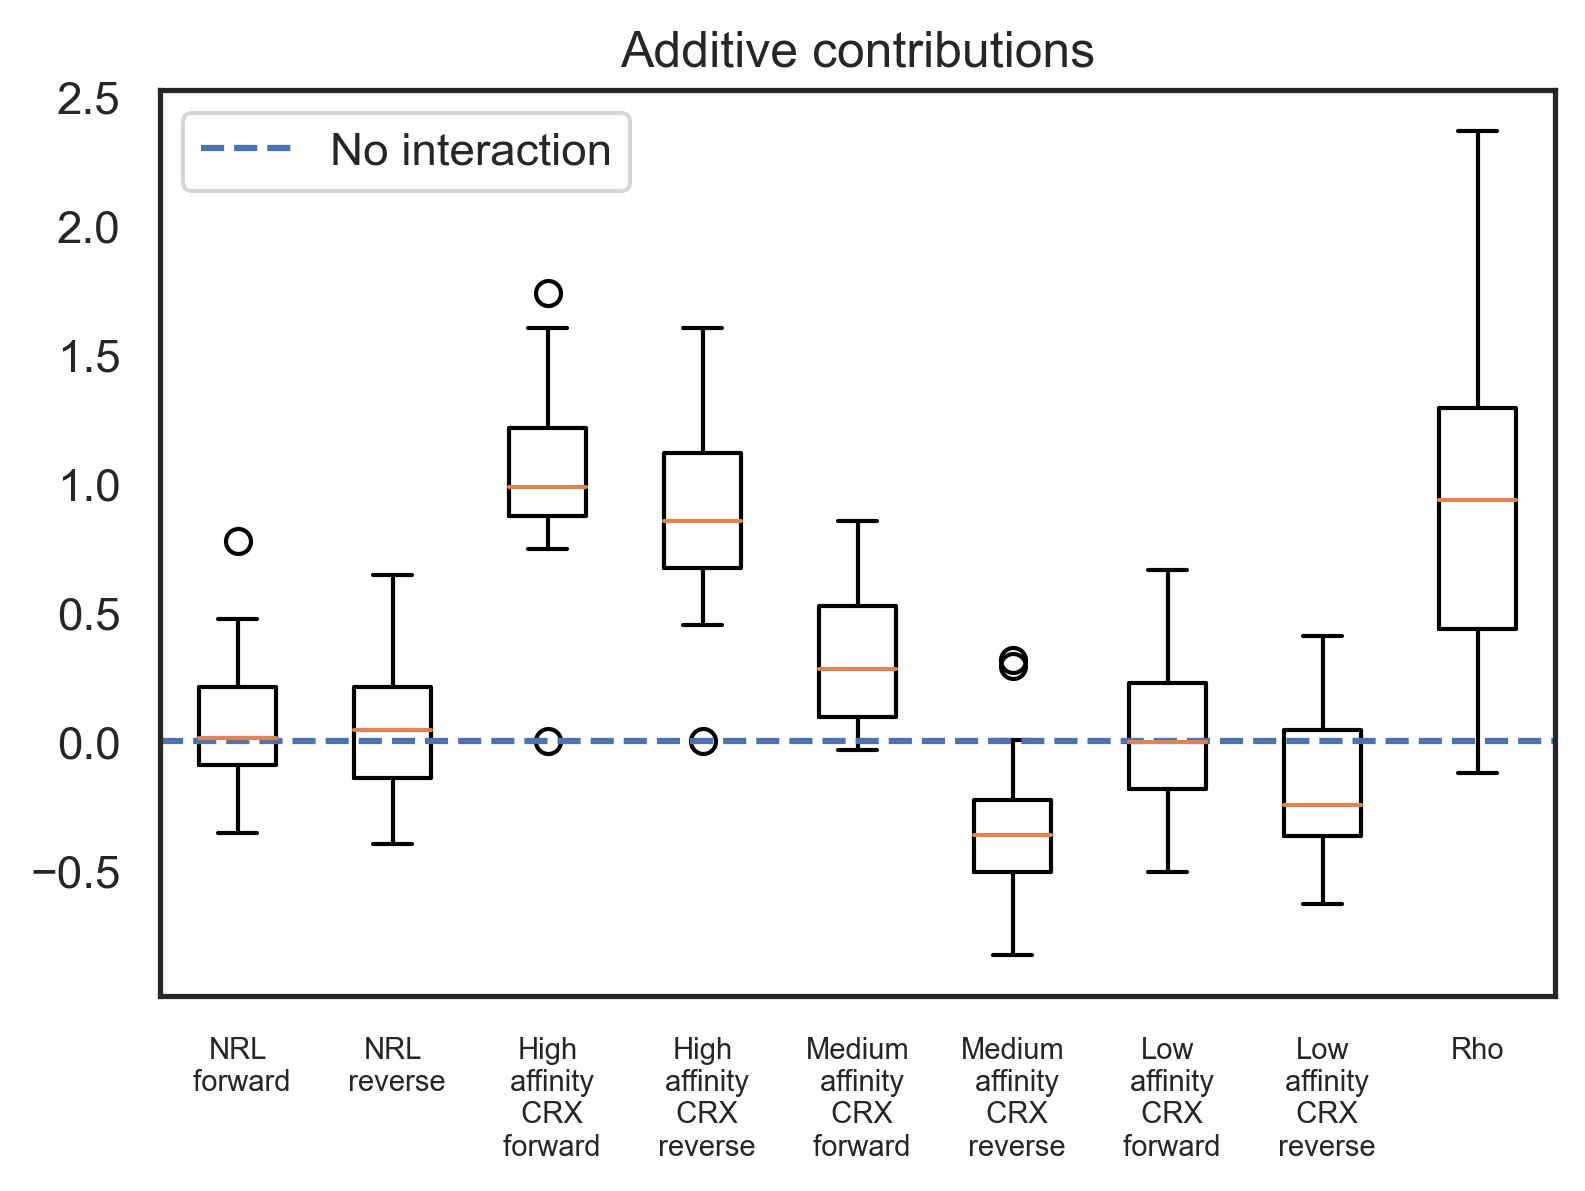

In [29]:
# Plot additive contributions of CRX, NRL, and Rho in CRX wt retina

All_contributions = []
for model in bootstrap_models:
    # Retrieve G-P map parameter dict and view dict keys
    theta_dict = model.get_theta(gauge="user", x_wt = "OOOOH")
    logo_df = theta_dict['logomaker_df']
    TF_additive = ((logo_df.iloc[0][0:8] + logo_df.iloc[1][0:8] + logo_df.iloc[2][0:8] + logo_df.iloc[3][0:8])/4).tolist()
    TF_additive.append(logo_df.iloc[4][8])
    All_contributions.append(TF_additive)
        
        
plt.boxplot(np.asarray(All_contributions))
x = np.linspace(1, 9, 9)
plt.xticks(x, ["NRL\n forward", "NRL\n reverse", "High\n affinity\n CRX\n forward", "High\n affinity\n CRX\n reverse",
              "Medium\n affinity\n CRX\n forward", "Medium\n affinity\n CRX\n reverse", 
              "Low\n affinity\n CRX\n forward", "Low\n affinity\n CRX\n reverse", "Rho"], fontsize = 7)
plt.axhline(0, linestyle = "--", label = "No interaction")
plt.legend()
plt.title("Additive contributions")
plt.show()

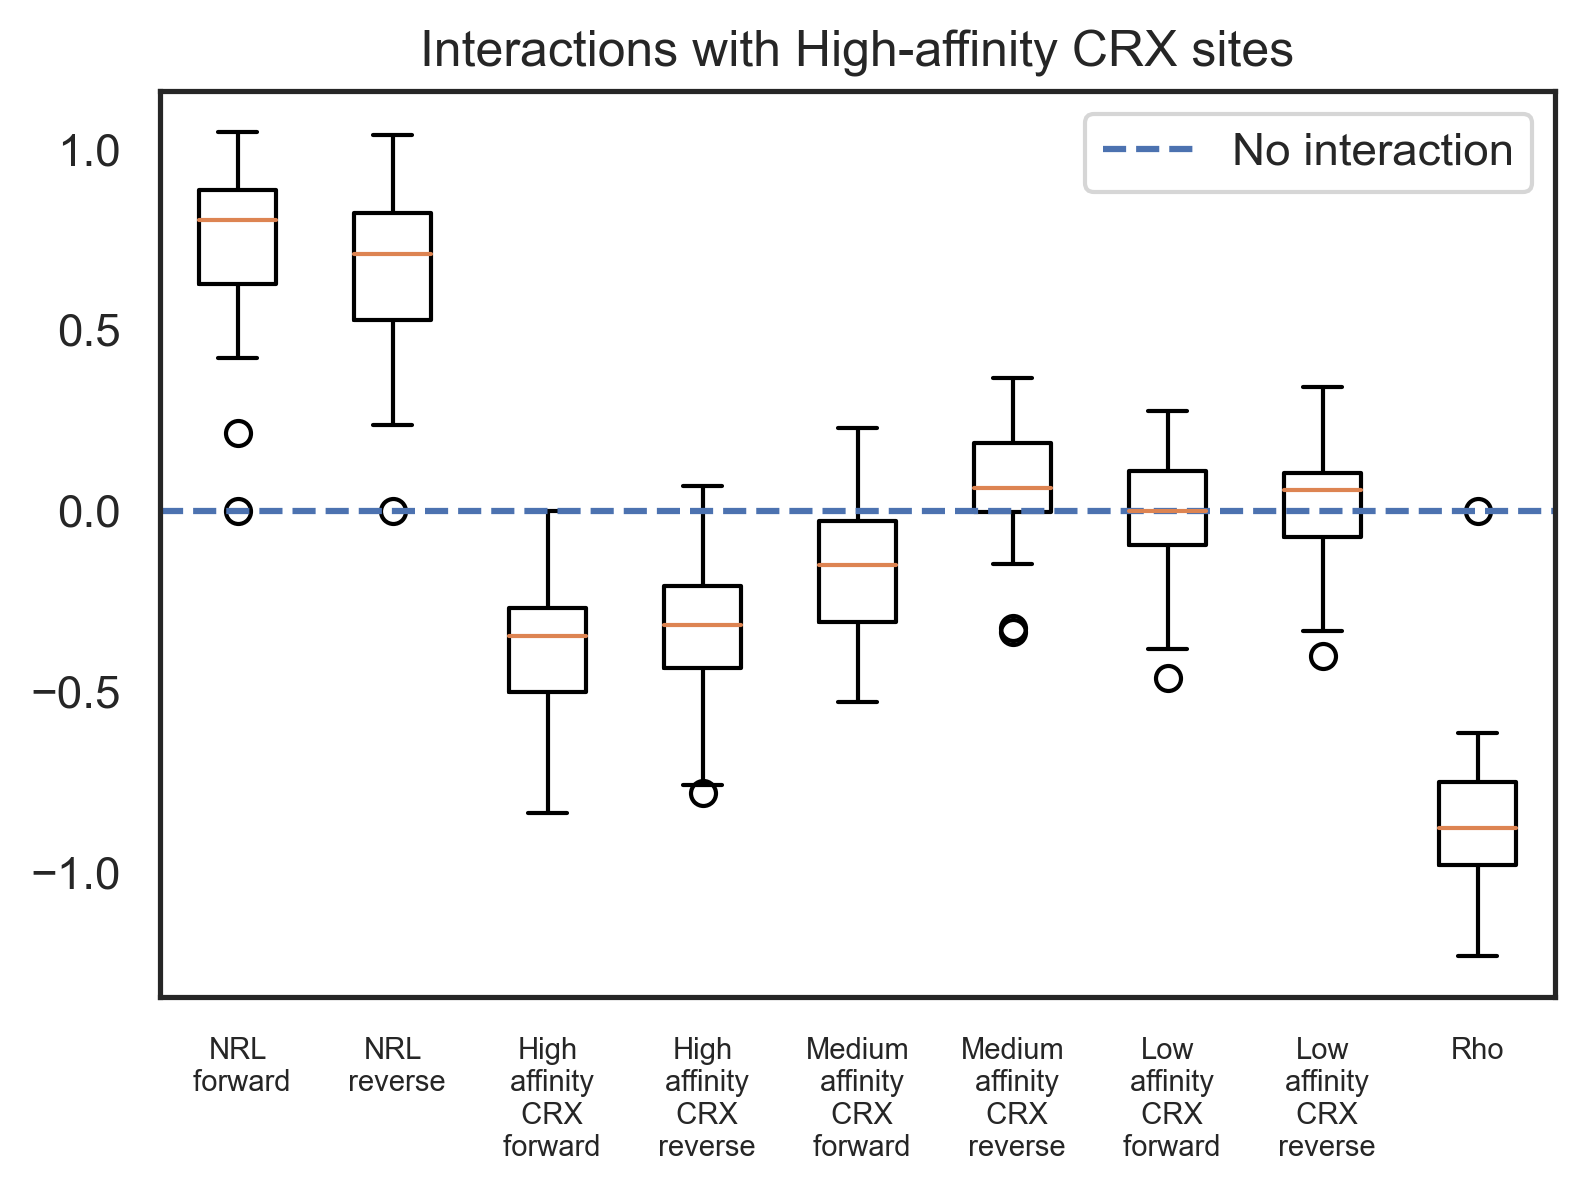

In [31]:
# Plot interactions between high-affinity CRX sites and CRX, NRL, and Rho in CRX wt retina

All_CRX_high_interactions = []
for model in bootstrap_models:
    # Retrieve G-P map parameter dict and view dict keys
    theta_dict = model.get_theta(gauge="user", x_wt = "OOOOH")
    TF_TF_interactions = np.transpose(theta_dict['theta_lclc'], axes = (1, 3, 0, 2))
    All_CRX_high_interactions.append([])
    for i in range(8):
        interactions = TF_TF_interactions[2:4, i, 0:5, 0:5].flatten() + TF_TF_interactions[i, 2:4, 0:5, 0:5].flatten()
        All_CRX_high_interactions[-1].append(np.mean(interactions[np.logical_not(np.isnan(interactions))]))
    All_CRX_high_interactions[-1].append(np.mean(TF_TF_interactions[2:4, 8, 0:4, 4]))
        
plt.boxplot(np.asarray(All_CRX_high_interactions))
x = np.linspace(1, 9, 9)
plt.xticks(x, ["NRL\n forward", "NRL\n reverse", "High\n affinity\n CRX\n forward", "High\n affinity\n CRX\n reverse",
              "Medium\n affinity\n CRX\n forward", "Medium\n affinity\n CRX\n reverse", 
              "Low\n affinity\n CRX\n forward", "Low\n affinity\n CRX\n reverse", "Rho"], fontsize = 7)
plt.axhline(0, linestyle = "--", label = "No interaction")
plt.legend()
plt.title("Interactions with High-affinity CRX sites")
plt.show()

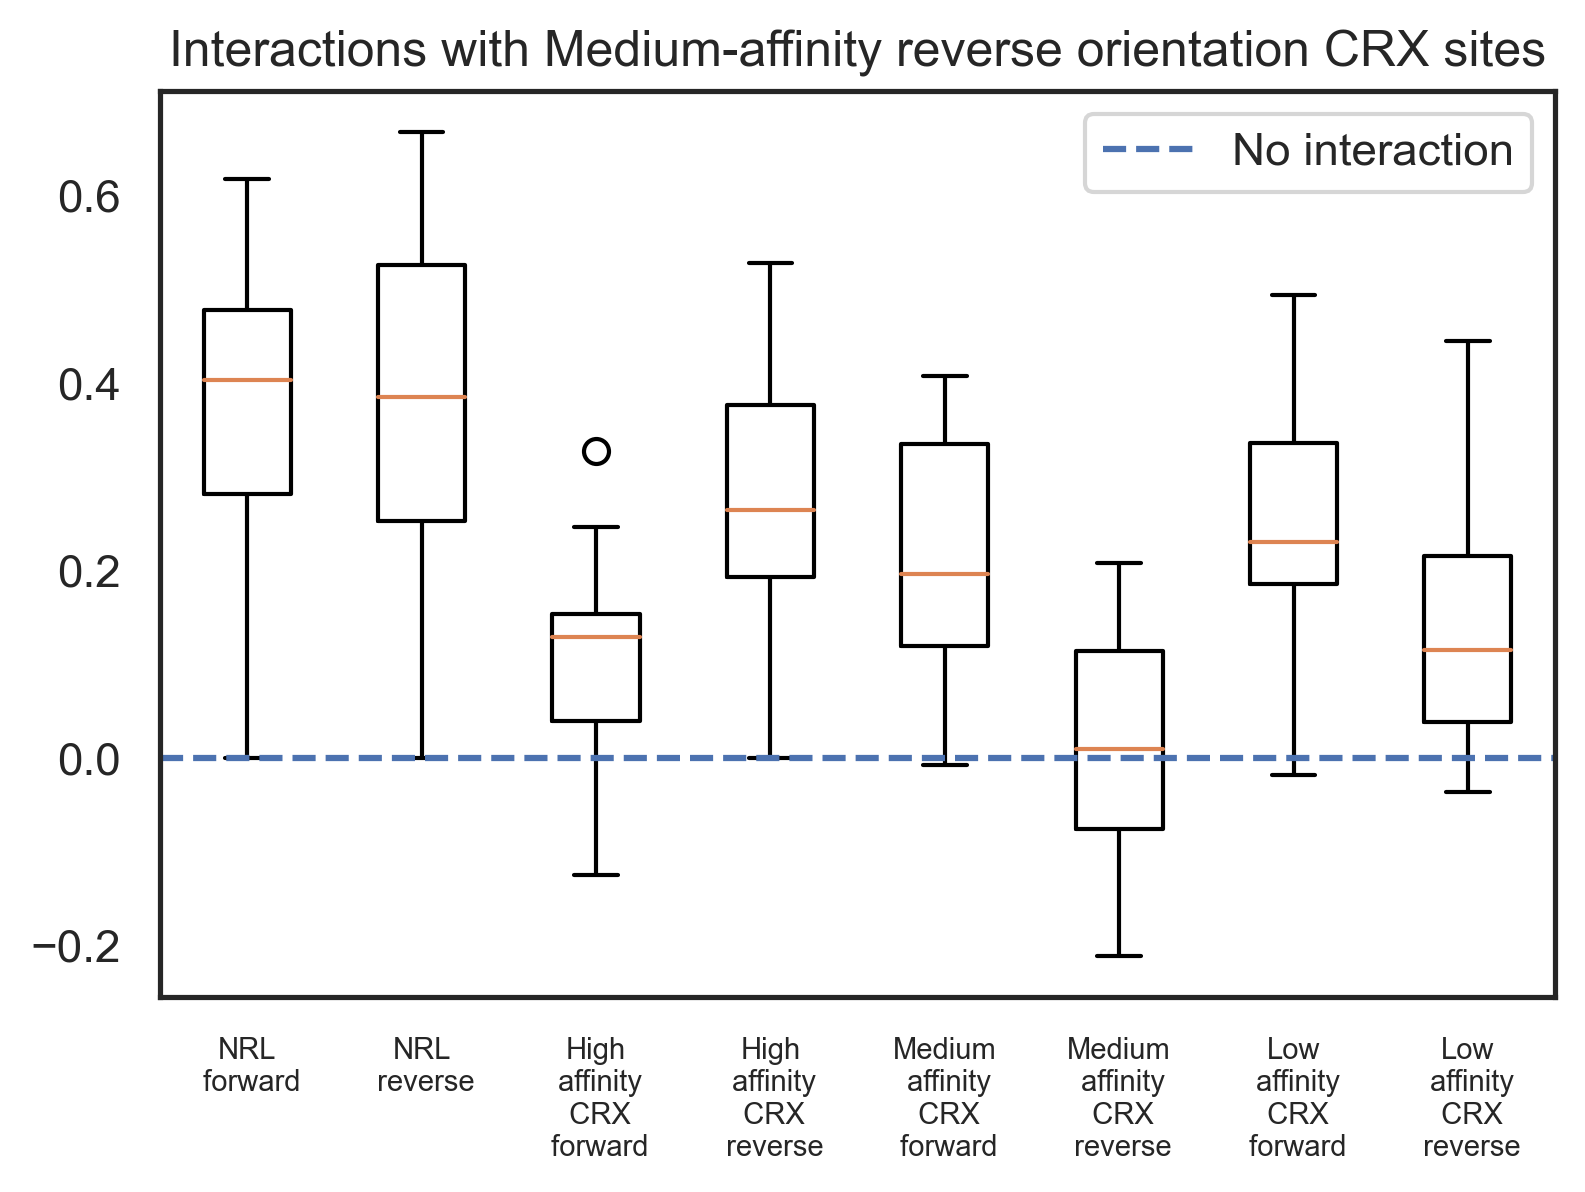

In [32]:
# Plot interactions between medium-affinity reverse orientation CRX sites and CRX, NRL, and Rho in CRX wt retina

All_CRX_medium_interactions = []
for model in bootstrap_models:
    # Retrieve G-P map parameter dict and view dict keys
    theta_dict = model.get_theta(gauge="user", x_wt = "OOOOH")
    TF_TF_interactions = np.transpose(theta_dict['theta_lclc'], axes = (1, 3, 0, 2))
    All_CRX_medium_interactions.append([])
    for i in range(8):
        interactions = TF_TF_interactions[i, 5, 0:5, 0:5].flatten() # + TF_TF_interactions[5, i, 0:5, 0:5].flatten()
        All_CRX_medium_interactions[-1].append(np.mean(interactions[np.logical_not(np.isnan(interactions))]))
    #All_CRX_medium_interactions[-1].append(np.mean(TF_TF_interactions[5, 8, 0:4, 4]))
        
plt.boxplot(np.asarray(All_CRX_medium_interactions))
x = np.linspace(1, 8, 8)
plt.xticks(x, ["NRL\n forward", "NRL\n reverse", "High\n affinity\n CRX\n forward", "High\n affinity\n CRX\n reverse",
              "Medium\n affinity\n CRX\n forward", "Medium\n affinity\n CRX\n reverse", 
              "Low\n affinity\n CRX\n forward", "Low\n affinity\n CRX\n reverse"], fontsize = 7) #, "Rho"
plt.axhline(0, linestyle = "--", label = "No interaction")
plt.legend()
plt.title("Interactions with Medium-affinity reverse orientation CRX sites")
plt.show()

In [11]:
# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']

# Create list of model names
model_names = [f'crxnull_{gpmap_type}_ge_{i}' for gpmap_type in gpmap_types for i in range(20)]

# Load models into a dictionary indexed by model name
model_dict = {name:mavenn.load(name) for name in model_names}

Model loaded from these files:
	crxnull_additive_ge_0.pickle
	crxnull_additive_ge_0.h5
Model loaded from these files:
	crxnull_additive_ge_1.pickle
	crxnull_additive_ge_1.h5
Model loaded from these files:
	crxnull_additive_ge_2.pickle
	crxnull_additive_ge_2.h5
Model loaded from these files:
	crxnull_additive_ge_3.pickle
	crxnull_additive_ge_3.h5
Model loaded from these files:
	crxnull_additive_ge_4.pickle
	crxnull_additive_ge_4.h5
Model loaded from these files:
	crxnull_additive_ge_5.pickle
	crxnull_additive_ge_5.h5
Model loaded from these files:
	crxnull_additive_ge_6.pickle
	crxnull_additive_ge_6.h5
Model loaded from these files:
	crxnull_additive_ge_7.pickle
	crxnull_additive_ge_7.h5
Model loaded from these files:
	crxnull_additive_ge_8.pickle
	crxnull_additive_ge_8.h5
Model loaded from these files:
	crxnull_additive_ge_9.pickle
	crxnull_additive_ge_9.h5
Model loaded from these files:
	crxnull_additive_ge_10.pickle
	crxnull_additive_ge_10.h5
Model loaded from these files:
	crxnull_a

In [13]:
# Get data from Jamie's library in CRX null retina

Data_file = open("CRX_null_trainval.pkl", "rb")
trainval_df = pickle.load(Data_file)
Data_file.close()

Data_file = open("CRX_null_test.pkl", "rb")
test_df = pickle.load(Data_file)
Data_file.close()

Data_df = pd.DataFrame()
Data_df['x'] = pd.concat([trainval_df['synthetic_promoter'], test_df['synthetic_promoter']])
assignments = []
for validation in trainval_df['validation']:
    if validation:
        assignments.append('validation')
    else:
        assignments.append('training')
assignments = assignments + ['test']*len(test_df)
Data_df['set'] = assignments
Data_df

,x,set
0,OOOO,training
1,OOOc,training
2,OOOC,training
3,OOOn,training
4,OOON,training
...,...,...
148,XxNX,test
149,xXRc,test
150,xxRr,test
151,xxXc,test


In [14]:
# Fit bootstrap models

name = 'crxnull_pairwise_ge_12'

# Get model
model = model_dict[name]

bootstrap_models = model.bootstrap(Data_df, num_models = 20)
for i, model in enumerate(bootstrap_models):
    model_name = "CRX_null_bootstrap_" + str(i)
    model.save(model_name)

Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 0 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0547 sec.


0epoch [00:00, ?epoch/s]

Training time: 19.0 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 1 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.16 sec.


0epoch [00:00, ?epoch/s]

Training time: 19.2 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 2 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0566 sec.


0epoch [00:00, ?epoch/s]

Training time: 19.6 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 3 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0897 sec.


0epoch [00:00, ?epoch/s]

Training time: 21.8 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 4 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0549 sec.


0epoch [00:00, ?epoch/s]

Training time: 23.2 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 5 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0518 sec.


0epoch [00:00, ?epoch/s]

Training time: 20.1 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 6 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.102 sec.


0epoch [00:00, ?epoch/s]

Training time: 20.5 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 7 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0727 sec.


0epoch [00:00, ?epoch/s]

Training time: 18.8 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 8 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0621 sec.


0epoch [00:00, ?epoch/s]

Training time: 17.3 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 9 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0581 sec.


0epoch [00:00, ?epoch/s]

Training time: 16.6 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 10 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0509 sec.


0epoch [00:00, ?epoch/s]

Training time: 15.9 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 11 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0491 sec.


0epoch [00:00, ?epoch/s]

Training time: 15.9 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 12 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0573 sec.


0epoch [00:00, ?epoch/s]

Training time: 16.9 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 13 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0539 sec.


0epoch [00:00, ?epoch/s]

Training time: 13.4 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 14 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0451 sec.


0epoch [00:00, ?epoch/s]

Training time: 18.8 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 15 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.062 sec.


0epoch [00:00, ?epoch/s]

Training time: 19.3 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 16 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0615 sec.


0epoch [00:00, ?epoch/s]

Training time: 26.8 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 17 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0461 sec.


0epoch [00:00, ?epoch/s]

Training time: 17.2 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 18 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0686 sec.


0epoch [00:00, ?epoch/s]

Training time: 15.2 seconds
Training set   :    1,024 observations (  79.32%)
Validation set :      114 observations (   8.83%)
Test set       :      153 observations (  11.85%)
-------------------------------------------------
Total dataset  :    1,291 observations ( 100.00%)

training model 19 ...
N = 1,138 observations set as training data.
Using 10.0% for validation.
Data shuffled.
Time to set data: 0.0533 sec.


0epoch [00:00, ?epoch/s]

Training time: 17.2 seconds
Model saved to these files:
	CRX_null_bootstrap_0.pickle
	CRX_null_bootstrap_0.h5
Model saved to these files:
	CRX_null_bootstrap_1.pickle
	CRX_null_bootstrap_1.h5
Model saved to these files:
	CRX_null_bootstrap_2.pickle
	CRX_null_bootstrap_2.h5
Model saved to these files:
	CRX_null_bootstrap_3.pickle
	CRX_null_bootstrap_3.h5
Model saved to these files:
	CRX_null_bootstrap_4.pickle
	CRX_null_bootstrap_4.h5
Model saved to these files:
	CRX_null_bootstrap_5.pickle
	CRX_null_bootstrap_5.h5
Model saved to these files:
	CRX_null_bootstrap_6.pickle
	CRX_null_bootstrap_6.h5
Model saved to these files:
	CRX_null_bootstrap_7.pickle
	CRX_null_bootstrap_7.h5
Model saved to these files:
	CRX_null_bootstrap_8.pickle
	CRX_null_bootstrap_8.h5
Model saved to these files:
	CRX_null_bootstrap_9.pickle
	CRX_null_bootstrap_9.h5
Model saved to these files:
	CRX_null_bootstrap_10.pickle
	CRX_null_bootstrap_10.h5
Model saved to these files:
	CRX_null_bootstrap_11.pickle
	CRX_null_

In [33]:
# Load bootstrap models
model_names = ["CRX_null_bootstrap_" + str(i) for i in range(20)]
CRX_null_bootstrap_models = [mavenn.load(name) for name in model_names]

Model loaded from these files:
	CRX_null_bootstrap_0.pickle
	CRX_null_bootstrap_0.h5
Model loaded from these files:
	CRX_null_bootstrap_1.pickle
	CRX_null_bootstrap_1.h5
Model loaded from these files:
	CRX_null_bootstrap_2.pickle
	CRX_null_bootstrap_2.h5
Model loaded from these files:
	CRX_null_bootstrap_3.pickle
	CRX_null_bootstrap_3.h5
Model loaded from these files:
	CRX_null_bootstrap_4.pickle
	CRX_null_bootstrap_4.h5
Model loaded from these files:
	CRX_null_bootstrap_5.pickle
	CRX_null_bootstrap_5.h5
Model loaded from these files:
	CRX_null_bootstrap_6.pickle
	CRX_null_bootstrap_6.h5
Model loaded from these files:
	CRX_null_bootstrap_7.pickle
	CRX_null_bootstrap_7.h5
Model loaded from these files:
	CRX_null_bootstrap_8.pickle
	CRX_null_bootstrap_8.h5
Model loaded from these files:
	CRX_null_bootstrap_9.pickle
	CRX_null_bootstrap_9.h5
Model loaded from these files:
	CRX_null_bootstrap_10.pickle
	CRX_null_bootstrap_10.h5
Model loaded from these files:
	CRX_null_bootstrap_11.pickle
	C

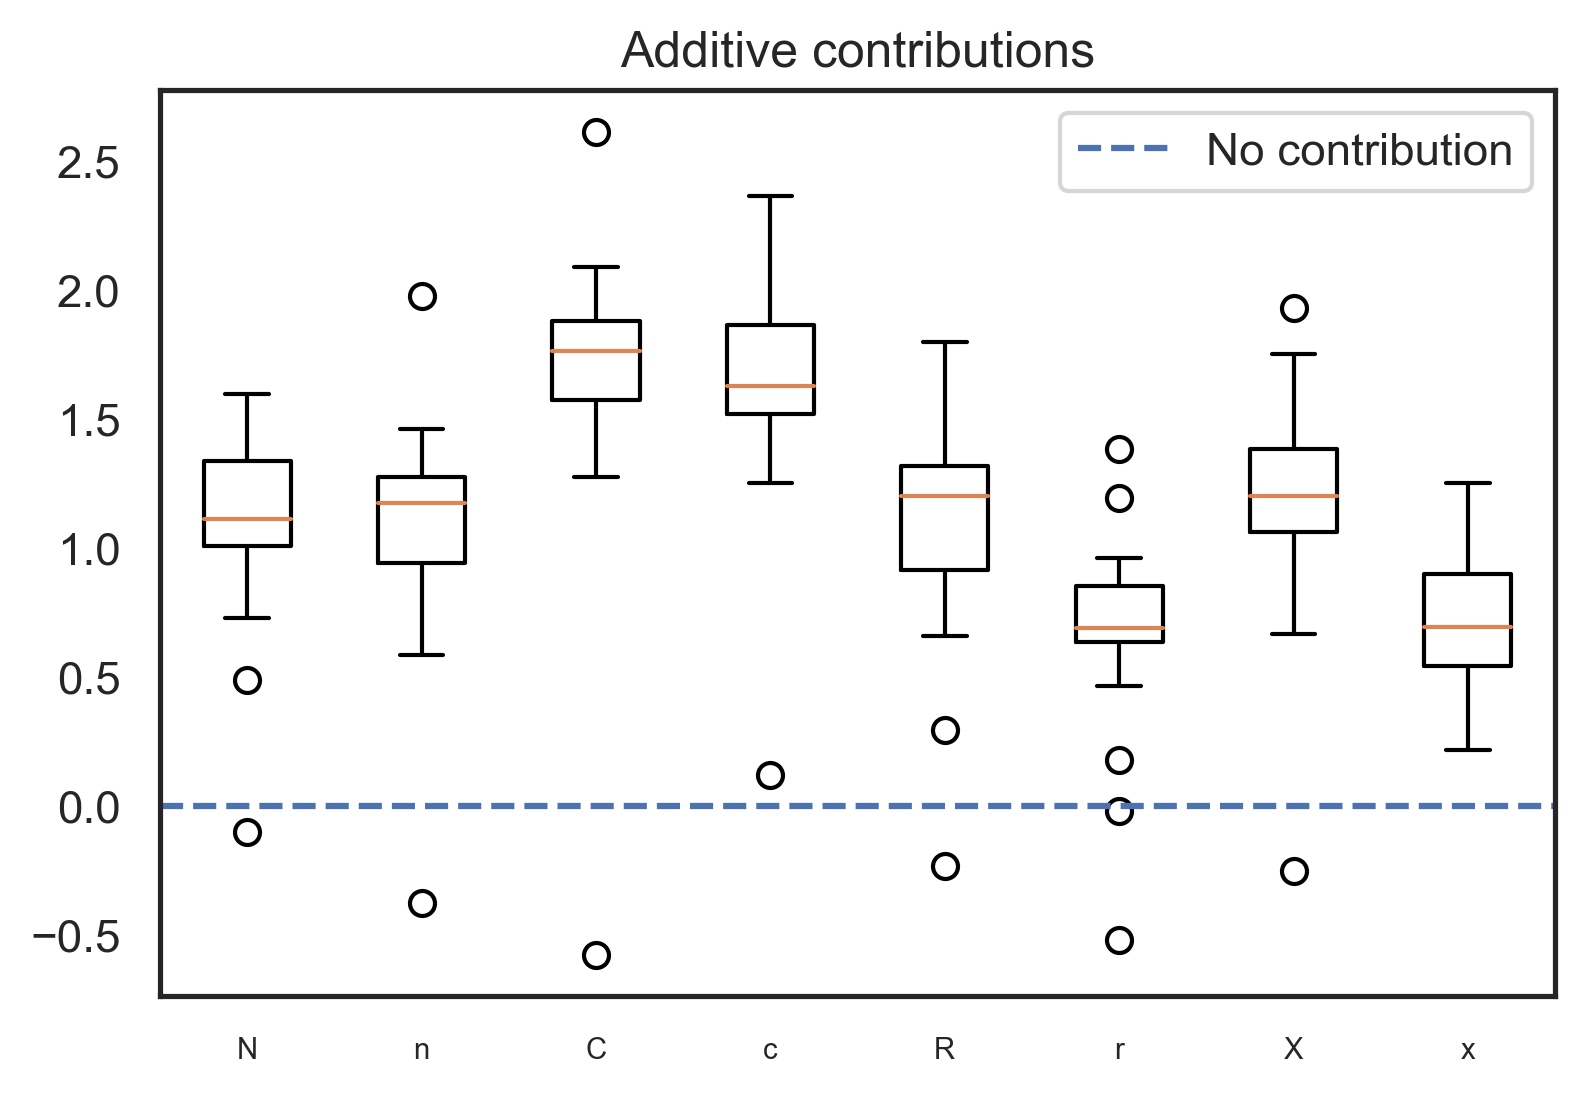

In [34]:
# Plot additive contributions in CRX null retina

Additive_contributions = []
for model in CRX_null_bootstrap_models:
    # Retrieve G-P map parameter dict and view dict keys
    theta_dict = model.get_theta(gauge="user", x_wt = "OOOO")
    
    # Get logo dataframe
    logo_df = theta_dict['logomaker_df']
    
    TF_additive = (logo_df.iloc[0] + logo_df.iloc[1] + logo_df.iloc[2] + logo_df.iloc[3])/4
    Additive_contributions.append(TF_additive[0:8])
    
plt.boxplot(np.asarray(Additive_contributions))
x = np.linspace(1, 8, 8)
plt.xticks(x, ["N", "n", "C", "c", "R", "r", "X", "x"], fontsize = 7)
plt.axhline(0, linestyle = "--", label = "No contribution")
plt.legend()
plt.title("Additive contributions")
plt.show()

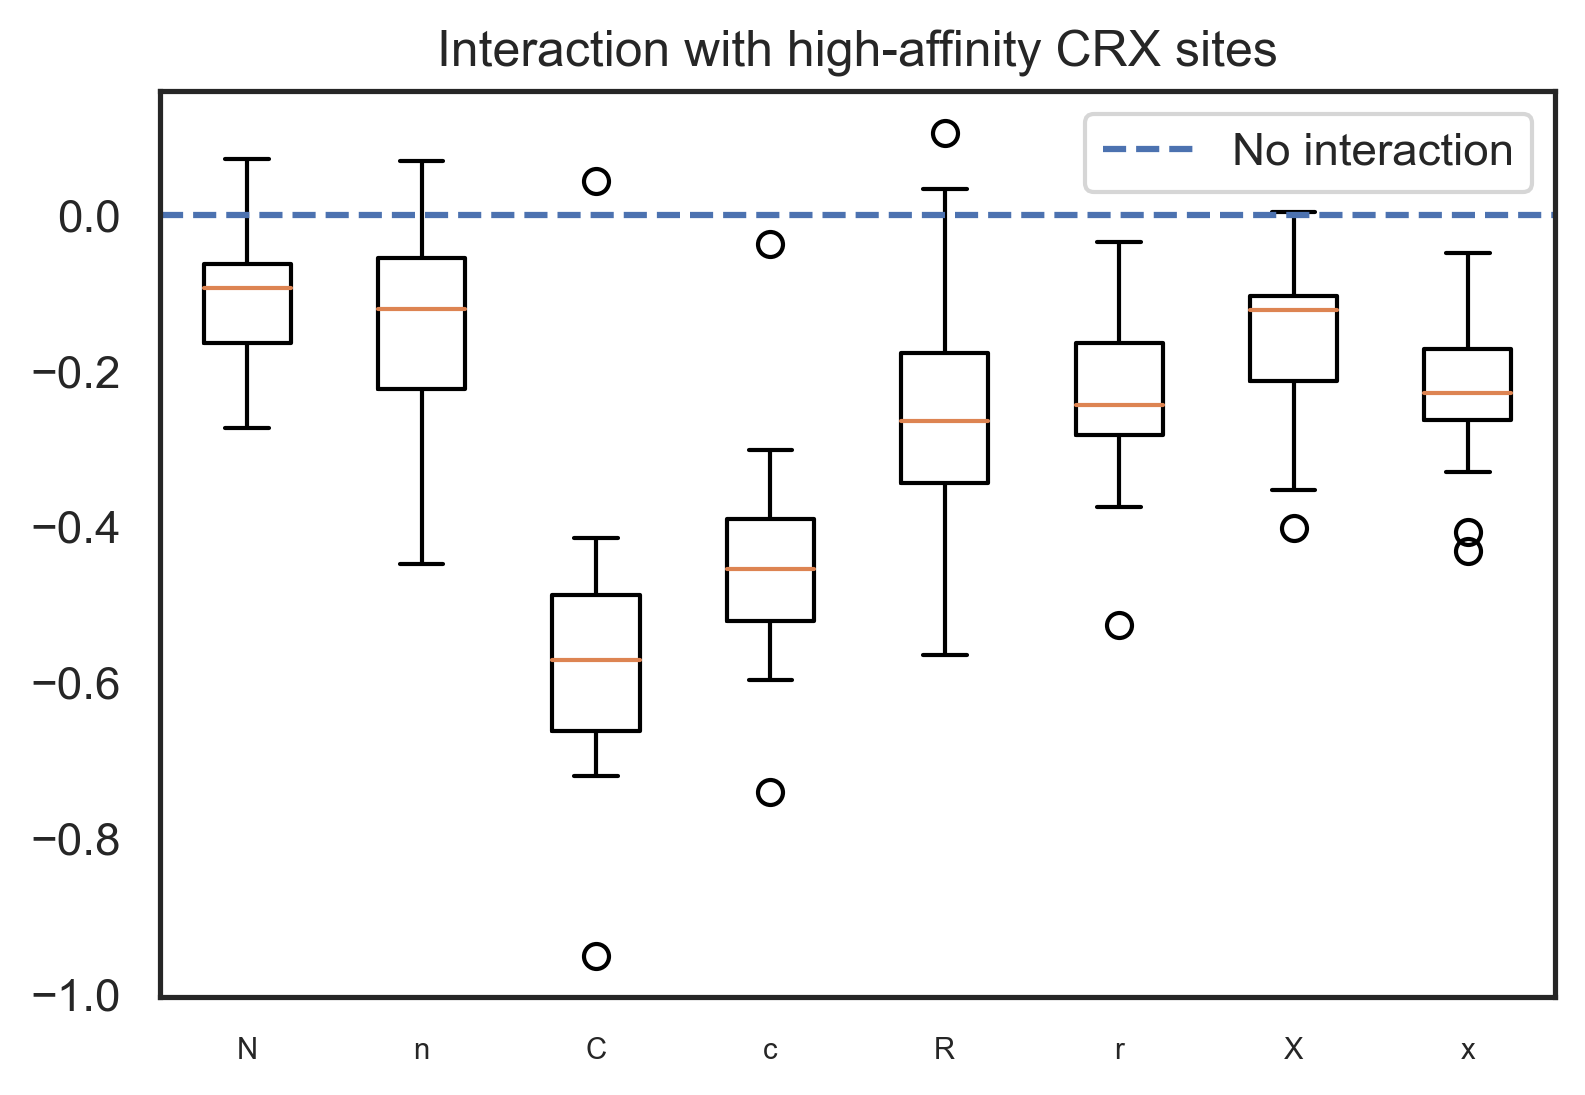

In [35]:
# Plot interactions involving high-affinity CRX sites in CRX null retina

Interactions = []
for model in CRX_null_bootstrap_models:
    # Retrieve G-P map parameter dict and view dict keys
    theta_dict = model.get_theta(gauge="user", x_wt = "OOOO")
    
    TF_TF_interactions = np.transpose(theta_dict['theta_lclc'], axes = (1, 3, 0, 2))
    Interactions.append([])
    for i in range(8):
        Interactions_flattened = np.concatenate([TF_TF_interactions[2:3, i], TF_TF_interactions[i, 2:3]]).flatten()
        Interactions[-1].append(np.mean(Interactions_flattened[np.logical_not(np.isnan(Interactions_flattened))]))

plt.boxplot(np.asarray(Interactions))
x = np.linspace(1, 8, 8)
plt.xticks(x, ["N", "n", "C", "c", "R", "r", "X", "x"], fontsize = 7)
plt.axhline(0, linestyle = "--", label = "No interaction")
plt.legend()
plt.title("Interaction with high-affinity CRX sites")
plt.show()

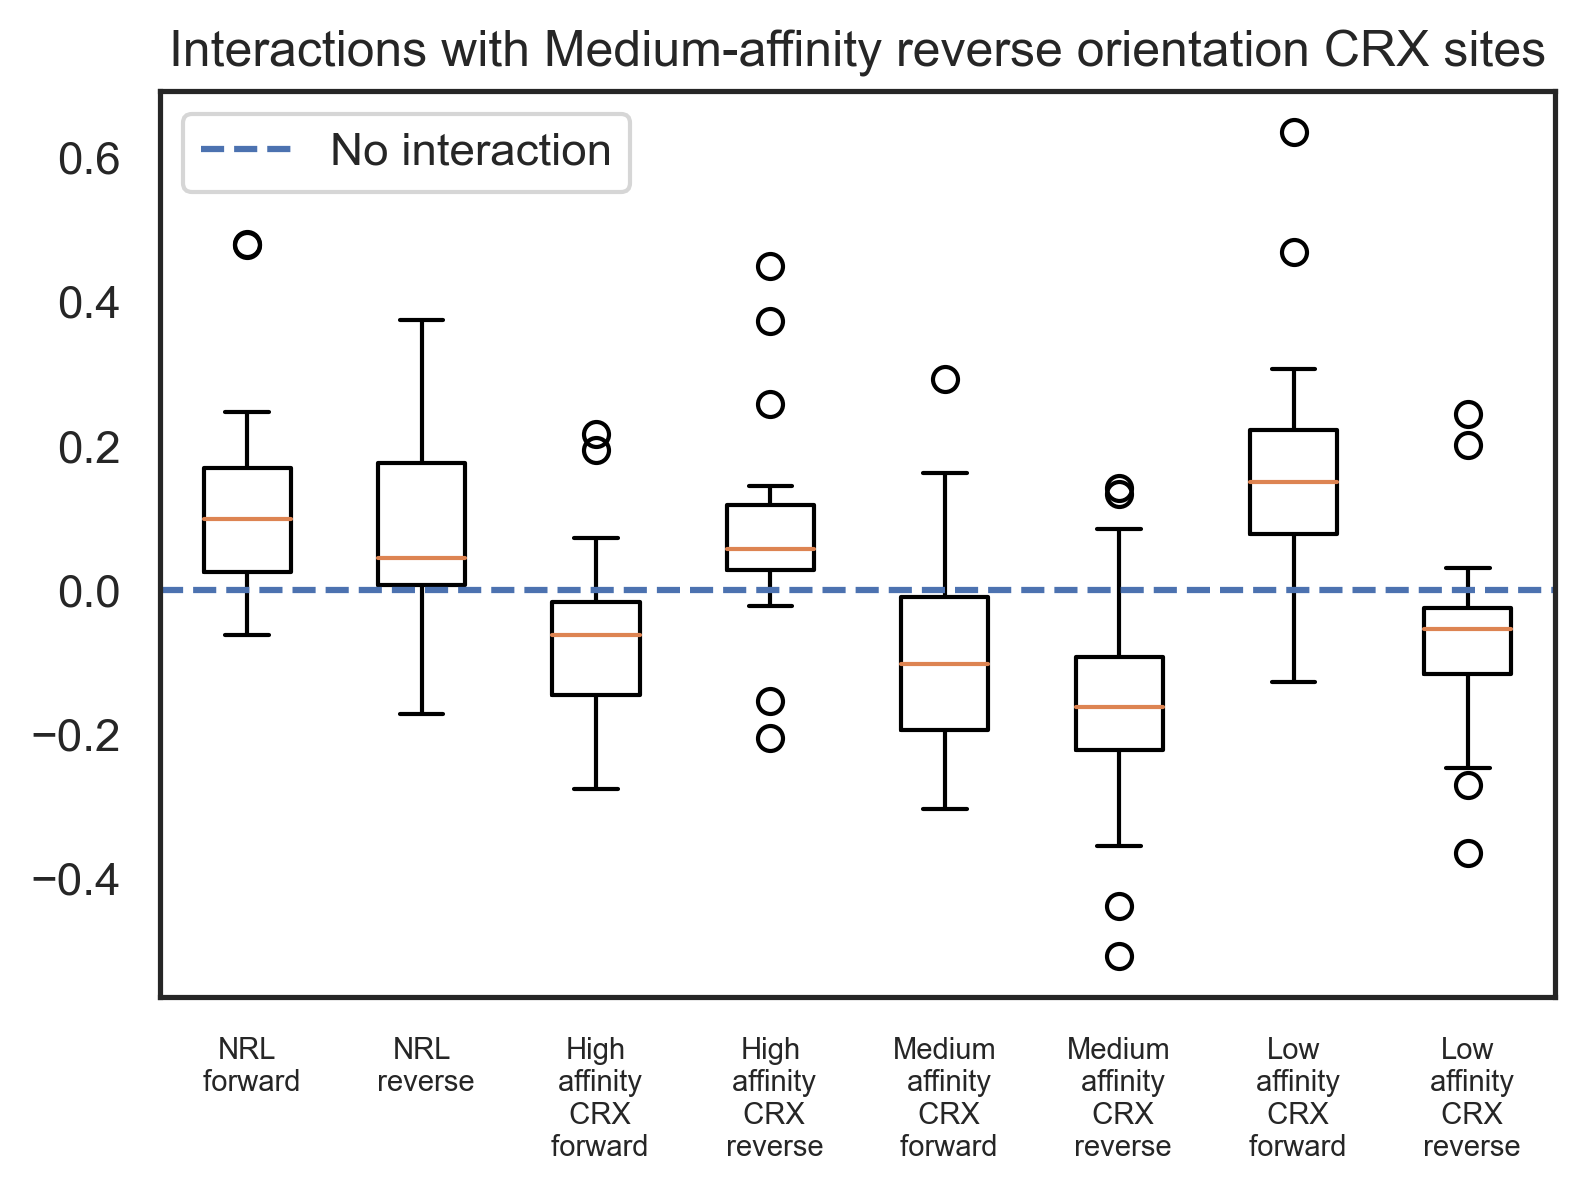

In [36]:
# Plot interactions involving medium affinity reverse orientation CRX sites in CRX null retina

All_CRX_medium_interactions = []
for model in CRX_null_bootstrap_models:
    # Retrieve G-P map parameter dict and view dict keys
    theta_dict = model.get_theta(gauge="user", x_wt = "OOOO")
    TF_TF_interactions = np.transpose(theta_dict['theta_lclc'], axes = (1, 3, 0, 2))
    All_CRX_medium_interactions.append([])
    for i in range(8):
        interactions = TF_TF_interactions[i, 5, 0:5, 0:5].flatten() # + TF_TF_interactions[5, i, 0:5, 0:5].flatten()
        All_CRX_medium_interactions[-1].append(np.mean(interactions[np.logical_not(np.isnan(interactions))]))
    #All_CRX_medium_interactions[-1].append(np.mean(TF_TF_interactions[5, 8, 0:4, 4]))
        
plt.boxplot(np.asarray(All_CRX_medium_interactions))
x = np.linspace(1, 8, 8)
plt.xticks(x, ["NRL\n forward", "NRL\n reverse", "High\n affinity\n CRX\n forward", "High\n affinity\n CRX\n reverse",
              "Medium\n affinity\n CRX\n forward", "Medium\n affinity\n CRX\n reverse", 
              "Low\n affinity\n CRX\n forward", "Low\n affinity\n CRX\n reverse"], fontsize = 7) #, "Rho"
plt.axhline(0, linestyle = "--", label = "No interaction")
plt.legend()
plt.title("Interactions with Medium-affinity reverse orientation CRX sites")
plt.show()

In [19]:
# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']

# Create list of model names
model_names = [f'CDNRM_{gpmap_type}_ge_{i}' for gpmap_type in gpmap_types for i in range(50)]

# Load models into a dictionary indexed by model name
model_dict = {name:mavenn.load(name) for name in model_names}

Model loaded from these files:
	CDNRM_additive_ge_0.pickle
	CDNRM_additive_ge_0.h5
Model loaded from these files:
	CDNRM_additive_ge_1.pickle
	CDNRM_additive_ge_1.h5
Model loaded from these files:
	CDNRM_additive_ge_2.pickle
	CDNRM_additive_ge_2.h5
Model loaded from these files:
	CDNRM_additive_ge_3.pickle
	CDNRM_additive_ge_3.h5
Model loaded from these files:
	CDNRM_additive_ge_4.pickle
	CDNRM_additive_ge_4.h5
Model loaded from these files:
	CDNRM_additive_ge_5.pickle
	CDNRM_additive_ge_5.h5
Model loaded from these files:
	CDNRM_additive_ge_6.pickle
	CDNRM_additive_ge_6.h5
Model loaded from these files:
	CDNRM_additive_ge_7.pickle
	CDNRM_additive_ge_7.h5
Model loaded from these files:
	CDNRM_additive_ge_8.pickle
	CDNRM_additive_ge_8.h5
Model loaded from these files:
	CDNRM_additive_ge_9.pickle
	CDNRM_additive_ge_9.h5
Model loaded from these files:
	CDNRM_additive_ge_10.pickle
	CDNRM_additive_ge_10.h5
Model loaded from these files:
	CDNRM_additive_ge_11.pickle
	CDNRM_additive_ge_11.h5


Model loaded from these files:
	CDNRM_neighbor_ge_47.pickle
	CDNRM_neighbor_ge_47.h5
Model loaded from these files:
	CDNRM_neighbor_ge_48.pickle
	CDNRM_neighbor_ge_48.h5
Model loaded from these files:
	CDNRM_neighbor_ge_49.pickle
	CDNRM_neighbor_ge_49.h5
Model loaded from these files:
	CDNRM_pairwise_ge_0.pickle
	CDNRM_pairwise_ge_0.h5
Model loaded from these files:
	CDNRM_pairwise_ge_1.pickle
	CDNRM_pairwise_ge_1.h5
Model loaded from these files:
	CDNRM_pairwise_ge_2.pickle
	CDNRM_pairwise_ge_2.h5
Model loaded from these files:
	CDNRM_pairwise_ge_3.pickle
	CDNRM_pairwise_ge_3.h5
Model loaded from these files:
	CDNRM_pairwise_ge_4.pickle
	CDNRM_pairwise_ge_4.h5
Model loaded from these files:
	CDNRM_pairwise_ge_5.pickle
	CDNRM_pairwise_ge_5.h5
Model loaded from these files:
	CDNRM_pairwise_ge_6.pickle
	CDNRM_pairwise_ge_6.h5
Model loaded from these files:
	CDNRM_pairwise_ge_7.pickle
	CDNRM_pairwise_ge_7.h5
Model loaded from these files:
	CDNRM_pairwise_ge_8.pickle
	CDNRM_pairwise_ge_8.h

Model loaded from these files:
	CDNRM_blackbox_ge_44.pickle
	CDNRM_blackbox_ge_44.h5
Model loaded from these files:
	CDNRM_blackbox_ge_45.pickle
	CDNRM_blackbox_ge_45.h5
Model loaded from these files:
	CDNRM_blackbox_ge_46.pickle
	CDNRM_blackbox_ge_46.h5
Model loaded from these files:
	CDNRM_blackbox_ge_47.pickle
	CDNRM_blackbox_ge_47.h5
Model loaded from these files:
	CDNRM_blackbox_ge_48.pickle
	CDNRM_blackbox_ge_48.h5
Model loaded from these files:
	CDNRM_blackbox_ge_49.pickle
	CDNRM_blackbox_ge_49.h5


In [21]:
# Get data from Ryan's library

Data_file = open("Ryan_trainval.pkl", "rb")
trainval_df = pickle.load(Data_file)
Data_file.close()

Data_file = open("Ryan_test.pkl", "rb")
test_df = pickle.load(Data_file)
Data_file.close()

Data_df = pd.DataFrame()
Data_df['x'] = pd.concat([trainval_df['Sequence'], test_df['Sequence']])
assignments = []
for validation in trainval_df['validation']:
    if validation:
        assignments.append('validation')
    else:
        assignments.append('training')
assignments = assignments + ['test']*len(test_df)
Data_df['set'] = assignments
Data_df

,x,set
0,CCCDZ,training
1,CCCEA,training
2,CCCEN,training
3,CCCAE,training
4,CCCAN,training
...,...,...
661,BERCX,test
662,BARXC,test
663,BZRCX,test
664,BNXRC,test


In [22]:
# Fit bootstrap models

name = "CDNRM_pairwise_ge_39"

# Get model
model = model_dict[name]

bootstrap_models = model.bootstrap(Data_df, num_models = 20)
for i, model in enumerate(bootstrap_models):
    model_name = "CDNRM_bootstrap_" + str(i)
    model.save(model_name)

Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 0 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.219 sec.


0epoch [00:00, ?epoch/s]

Training time: 65.1 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 1 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.221 sec.


0epoch [00:00, ?epoch/s]

Training time: 89.9 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 2 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.231 sec.


0epoch [00:00, ?epoch/s]

Training time: 102.1 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 3 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.251 sec.


0epoch [00:00, ?epoch/s]

Training time: 63.4 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 4 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.249 sec.


0epoch [00:00, ?epoch/s]

Training time: 87.3 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 5 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.365 sec.


0epoch [00:00, ?epoch/s]

Training time: 81.4 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 6 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.195 sec.


0epoch [00:00, ?epoch/s]

Training time: 82.9 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 7 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.438 sec.


0epoch [00:00, ?epoch/s]

Training time: 71.2 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 8 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.214 sec.


0epoch [00:00, ?epoch/s]

Training time: 60.2 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 9 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.407 sec.


0epoch [00:00, ?epoch/s]

Training time: 85.0 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 10 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.623 sec.


0epoch [00:00, ?epoch/s]

Training time: 84.7 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 11 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.211 sec.


0epoch [00:00, ?epoch/s]

Training time: 67.1 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 12 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.184 sec.


0epoch [00:00, ?epoch/s]

Training time: 71.7 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 13 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.188 sec.


0epoch [00:00, ?epoch/s]

Training time: 62.6 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 14 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.186 sec.


0epoch [00:00, ?epoch/s]

Training time: 50.8 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 15 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.244 sec.


0epoch [00:00, ?epoch/s]

Training time: 85.2 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 16 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.285 sec.


0epoch [00:00, ?epoch/s]

Training time: 67.6 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 17 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.286 sec.


0epoch [00:00, ?epoch/s]

Training time: 62.9 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 18 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.297 sec.


0epoch [00:00, ?epoch/s]

Training time: 72.6 seconds
Training set   :    5,274 observations (  79.93%)
Validation set :      658 observations (   9.97%)
Test set       :      666 observations (  10.09%)
-------------------------------------------------
Total dataset  :    6,598 observations ( 100.00%)

training model 19 ...
N = 5,932 observations set as training data.
Using 11.1% for validation.
Data shuffled.
Time to set data: 0.382 sec.


0epoch [00:00, ?epoch/s]

Training time: 58.3 seconds
Model saved to these files:
	CDNRM_bootstrap_0.pickle
	CDNRM_bootstrap_0.h5
Model saved to these files:
	CDNRM_bootstrap_1.pickle
	CDNRM_bootstrap_1.h5
Model saved to these files:
	CDNRM_bootstrap_2.pickle
	CDNRM_bootstrap_2.h5
Model saved to these files:
	CDNRM_bootstrap_3.pickle
	CDNRM_bootstrap_3.h5
Model saved to these files:
	CDNRM_bootstrap_4.pickle
	CDNRM_bootstrap_4.h5
Model saved to these files:
	CDNRM_bootstrap_5.pickle
	CDNRM_bootstrap_5.h5
Model saved to these files:
	CDNRM_bootstrap_6.pickle
	CDNRM_bootstrap_6.h5
Model saved to these files:
	CDNRM_bootstrap_7.pickle
	CDNRM_bootstrap_7.h5
Model saved to these files:
	CDNRM_bootstrap_8.pickle
	CDNRM_bootstrap_8.h5
Model saved to these files:
	CDNRM_bootstrap_9.pickle
	CDNRM_bootstrap_9.h5
Model saved to these files:
	CDNRM_bootstrap_10.pickle
	CDNRM_bootstrap_10.h5
Model saved to these files:
	CDNRM_bootstrap_11.pickle
	CDNRM_bootstrap_11.h5
Model saved to these files:
	CDNRM_bootstrap_12.pickle
	

In [37]:
# Load bootstrap models
model_names = ["CDNRM_bootstrap_" + str(i) for i in range(20)]
CDNRM_bootstrap_models = [mavenn.load(name) for name in model_names]

Model loaded from these files:
	CDNRM_bootstrap_0.pickle
	CDNRM_bootstrap_0.h5
Model loaded from these files:
	CDNRM_bootstrap_1.pickle
	CDNRM_bootstrap_1.h5
Model loaded from these files:
	CDNRM_bootstrap_2.pickle
	CDNRM_bootstrap_2.h5
Model loaded from these files:
	CDNRM_bootstrap_3.pickle
	CDNRM_bootstrap_3.h5
Model loaded from these files:
	CDNRM_bootstrap_4.pickle
	CDNRM_bootstrap_4.h5
Model loaded from these files:
	CDNRM_bootstrap_5.pickle
	CDNRM_bootstrap_5.h5
Model loaded from these files:
	CDNRM_bootstrap_6.pickle
	CDNRM_bootstrap_6.h5
Model loaded from these files:
	CDNRM_bootstrap_7.pickle
	CDNRM_bootstrap_7.h5
Model loaded from these files:
	CDNRM_bootstrap_8.pickle
	CDNRM_bootstrap_8.h5
Model loaded from these files:
	CDNRM_bootstrap_9.pickle
	CDNRM_bootstrap_9.h5
Model loaded from these files:
	CDNRM_bootstrap_10.pickle
	CDNRM_bootstrap_10.h5
Model loaded from these files:
	CDNRM_bootstrap_11.pickle
	CDNRM_bootstrap_11.h5
Model loaded from these files:
	CDNRM_bootstrap_

In [38]:
# Get site frequencies in Ryan's library (used to set gauge)

site_letters = ['C', 'R', 'X', 'D', 'E', 'N', 'L', 'O', 'B', 'A', 'Z']

Counts = [[0 for TF in site_letters] for i in range(5)]
for sequence in trainval_df["Sequence"]:
    for i, site in enumerate(sequence):
        for j, TF in enumerate(site_letters):
            if site == TF:
                Counts[i][j] = Counts[i][j] + 1
for sequence in test_df["Sequence"]:
    for i, site in enumerate(sequence):
        for j, TF in enumerate(site_letters):
            if site == TF:
                Counts[i][j] = Counts[i][j] + 1
    
Frequencies = np.asarray([np.asarray(position)/sum(position) for position in Counts])
Frequencies

array([[0.26189754, 0.15277357, 0.08714762, 0.08275235, 0.04183086,
        0.08275235, 0.04183086, 0.08260079, 0.04183086, 0.08275235,
        0.04183086],
       [0.26159442, 0.15277357, 0.08729918, 0.08275235, 0.04183086,
        0.08275235, 0.04183086, 0.08275235, 0.04183086, 0.08275235,
        0.04183086],
       [0.26189754, 0.15277357, 0.08729918, 0.08275235, 0.04183086,
        0.08275235, 0.0416793 , 0.08260079, 0.04183086, 0.08275235,
        0.04183086],
       [0.26189754, 0.15262201, 0.08729918, 0.08260079, 0.04183086,
        0.08275235, 0.04183086, 0.08275235, 0.04183086, 0.08275235,
        0.04183086],
       [0.26189754, 0.15262201, 0.08729918, 0.08260079, 0.04183086,
        0.08275235, 0.04183086, 0.08275235, 0.04183086, 0.08275235,
        0.04183086]])

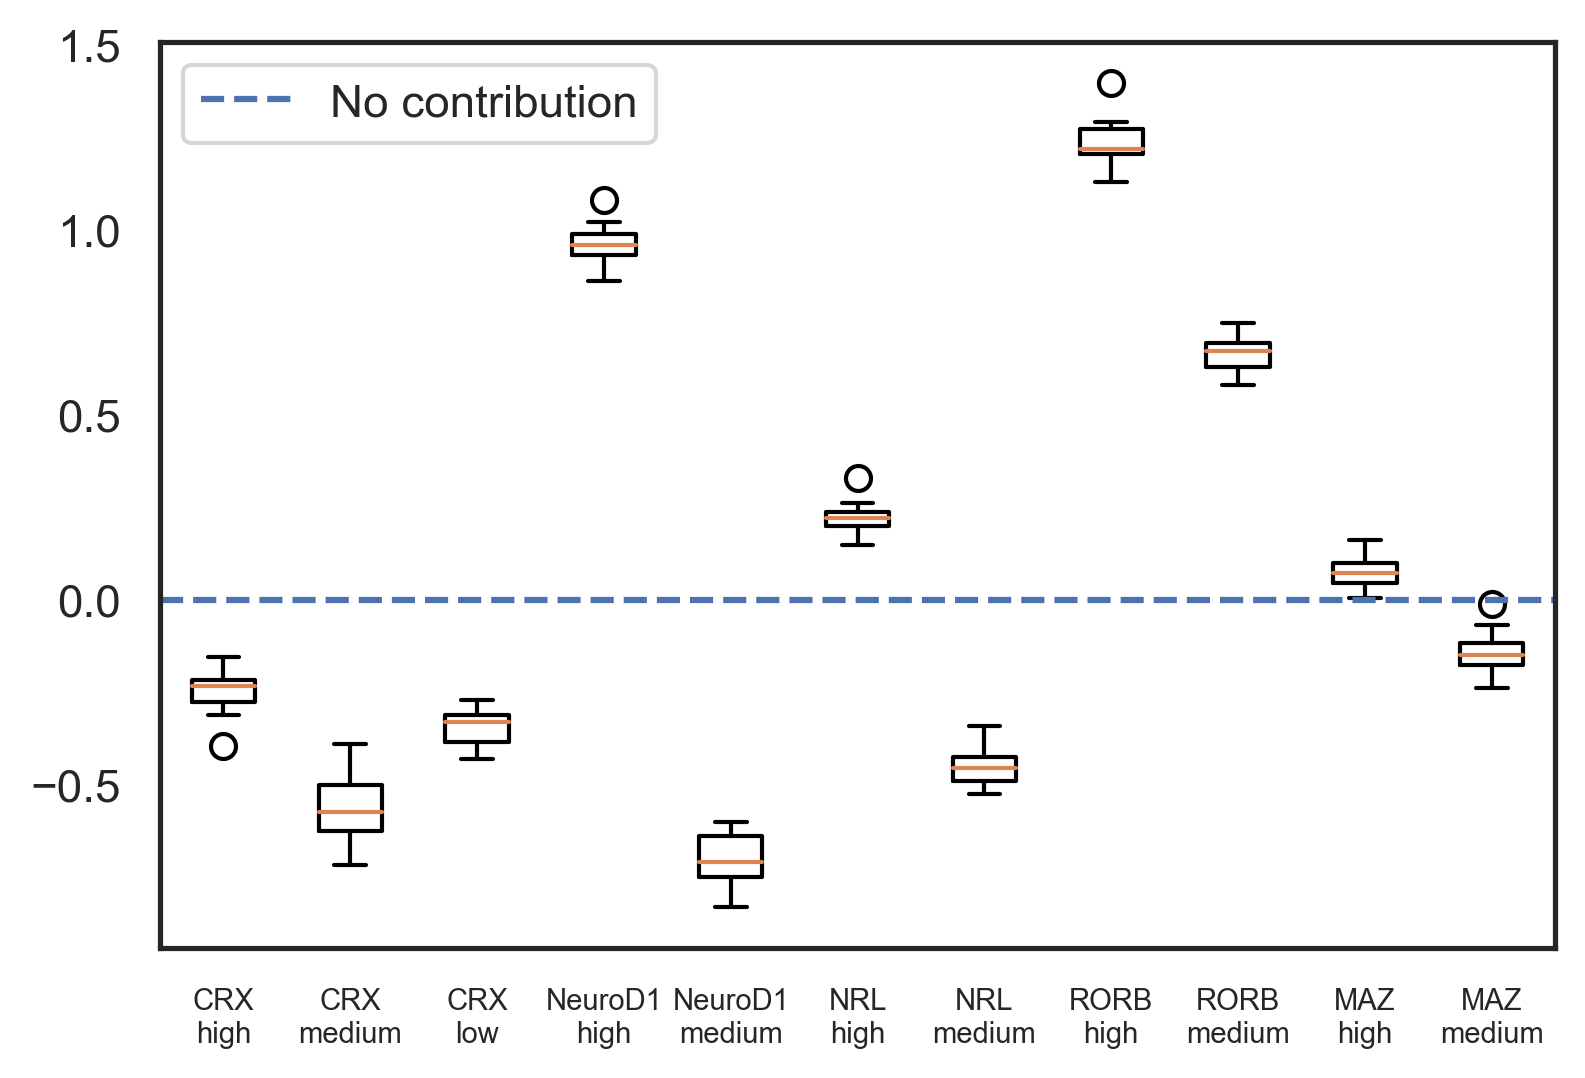

In [39]:
# Plot additive contributions in Ryan's library

All_contributions = []
for model in CDNRM_bootstrap_models:
    theta_dict = model.get_theta(gauge="user", p_lc = Frequencies)
    # Get logo dataframe
    logo_df = theta_dict['logomaker_df']
    TF_additive = (logo_df.iloc[0] + logo_df.iloc[1] + logo_df.iloc[2] + logo_df.iloc[3] + logo_df.iloc[4])/5
    All_contributions.append(TF_additive)

#np.asarray(All_contributions).shape
plt.boxplot(np.asarray(All_contributions))
x = np.linspace(1, 11, 11)
plt.xticks(x, ["CRX\nhigh", "CRX\nmedium", "CRX\nlow", "NeuroD1\nhigh", "NeuroD1\nmedium", "NRL\nhigh", "NRL\nmedium", "RORB\nhigh", "RORB\nmedium", "MAZ\nhigh", "MAZ\nmedium"], fontsize = 7)
plt.axhline(0, linestyle = "--", label = "No contribution")
plt.legend()
plt.show()

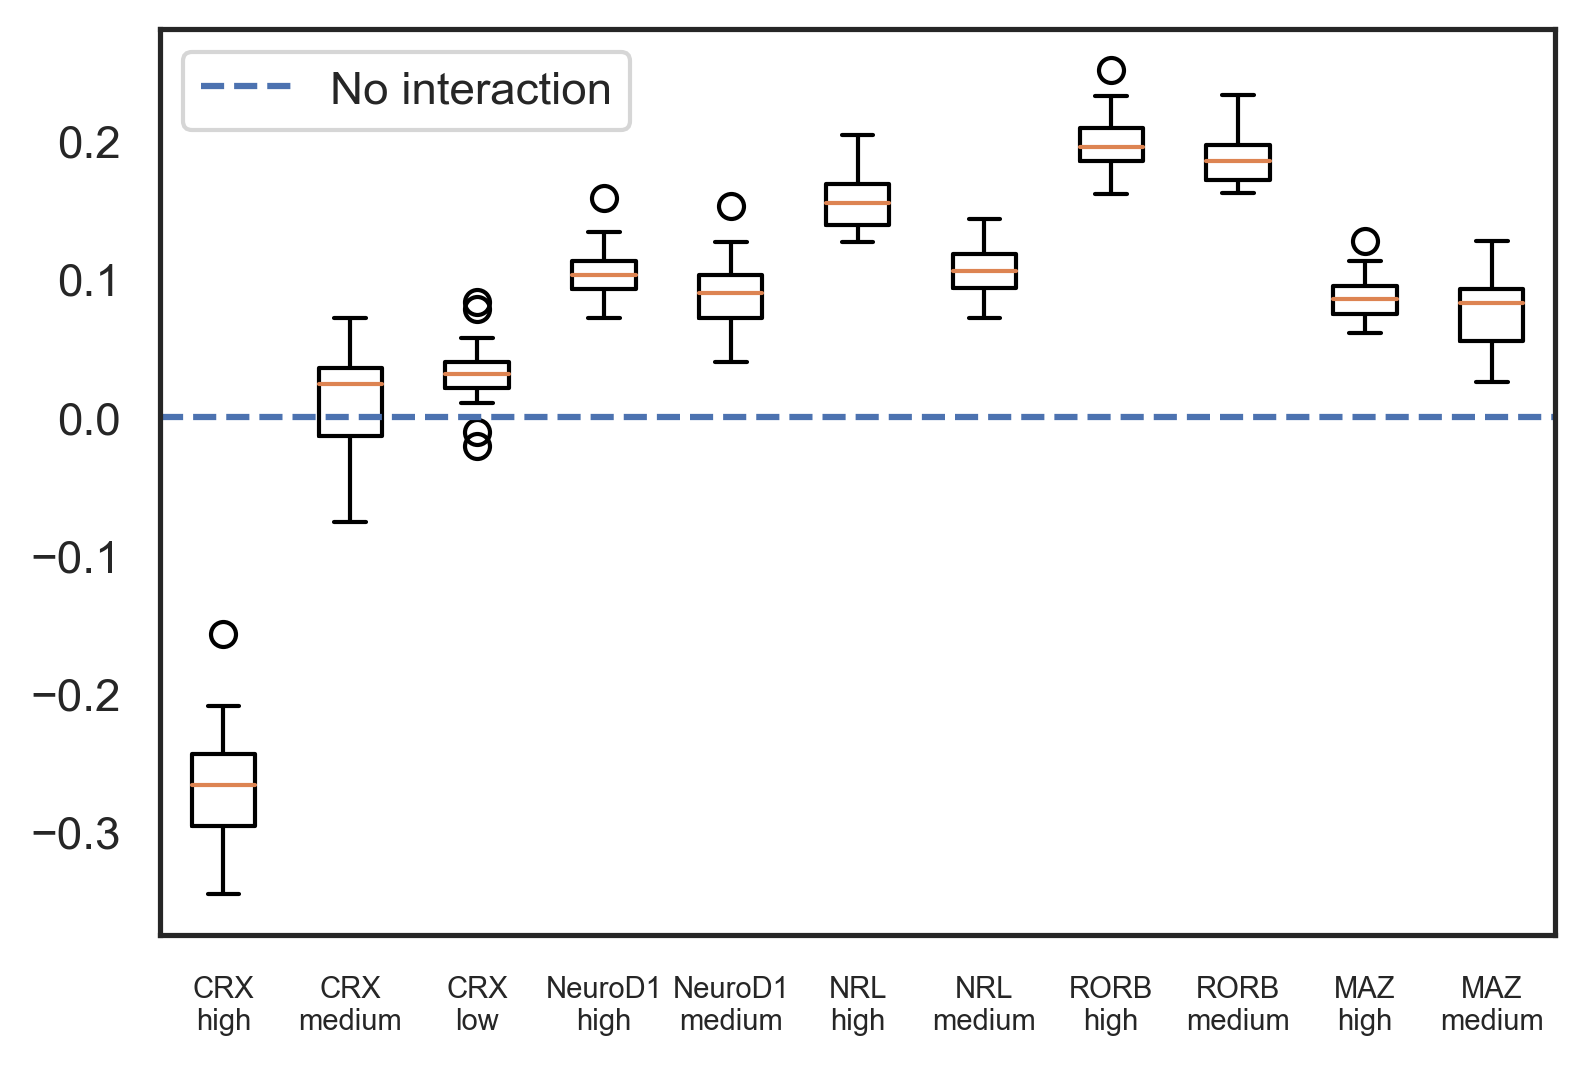

In [40]:
# Plot interactions involving high affinity CRX sites in Ryan's library

TF_TF_interactions_flattened = []
for model in CDNRM_bootstrap_models:
    theta_dict = model.get_theta(gauge="user", p_lc = Frequencies)
    TF_TF_interactions = np.transpose(theta_dict['theta_lclc'], axes = (1, 3, 0, 2))
    TF_TF_interactions_flattened.append([])
    for i in range(len(TF_TF_interactions)):
        interactions = np.concatenate([TF_TF_interactions[i, 0].flatten(), TF_TF_interactions[0, i].flatten()])
        TF_TF_interactions_flattened[-1].append(np.mean(interactions[np.logical_not(np.isnan(interactions))]))

TF_TF_interactions_flattened = np.asarray(TF_TF_interactions_flattened)
plt.boxplot(TF_TF_interactions_flattened)
plt.xticks(x, ["CRX\nhigh", "CRX\nmedium", "CRX\nlow", "NeuroD1\nhigh", "NeuroD1\nmedium", "NRL\nhigh", "NRL\nmedium", "RORB\nhigh", "RORB\nmedium", "MAZ\nhigh", "MAZ\nmedium"], fontsize = 7)
plt.axhline(0, linestyle = "--", label = "No interaction")
plt.legend()
plt.show()